In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [2]:
class_alt = pd.read_csv('/kaggle/input/eau-dataset/données/classe_alteration_seq_eau.csv')
list_faune = pd.read_csv('/kaggle/input/eau-dataset/données/liste_faunistique_floristique.csv')
physchim = pd.read_csv('/kaggle/input/eau-dataset/données/physicochimie.csv')
station = pd.read_csv('/kaggle/input/eau-dataset/données/station.csv')
taxon = pd.read_csv('/kaggle/input/eau-dataset/données/taxon.csv')
taxon_denom = pd.read_csv('/kaggle/input/eau-dataset/données/taxon_denombre.csv')

In [3]:
class_alt

,id,parametre_id,nom,alteration_id,nom.1,valeur,libelle,borne_inf_incluse,borne_sup_incluse,borne_inf,borne_sup,unite_mesure_code,libelle.1,norme
0,10231,1301,Température de l'Eau,0,TEMP,1,Bleu,t,f,\N,24,27,degré Celsius,DCE
1,10232,1301,Température de l'Eau,0,TEMP,2,Vert,t,f,24,25.5,27,degré Celsius,DCE
2,10233,1301,Température de l'Eau,0,TEMP,3,Jaune,t,f,25.5,27,27,degré Celsius,DCE
3,10234,1301,Température de l'Eau,0,TEMP,4,Orange,t,f,27,28,27,degré Celsius,DCE
4,10235,1301,Température de l'Eau,0,TEMP,5,Rouge,t,f,28,\N,27,degré Celsius,DCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,10659,1383,Zinc,16,MPMI,2,Vert,t,f,1.3999999999999999,14,133,microgramme par litre,SEQ
1097,10660,1383,Zinc,16,MPMI,3,Jaune,t,f,14,140,133,microgramme par litre,SEQ
1098,10661,1383,Zinc,16,MPMI,4,Orange,t,f,140,330,133,microgramme par litre,SEQ
1099,10662,1383,Zinc,16,MPMI,5,Rouge,t,f,330,\N,133,microgramme par litre,SEQ


In [4]:
physchim

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
0,398944,2007,10.825000,1301,Température de l'Eau,27,degré Celsius
1,398944,2008,10.300000,1301,Température de l'Eau,27,degré Celsius
2,398944,2009,11.208333,1301,Température de l'Eau,27,degré Celsius
3,398944,2010,10.930000,1301,Température de l'Eau,27,degré Celsius
4,398944,2011,10.433333,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
187437,421014,2008,11.250000,1375,Sodium,162,milligramme par litre
187438,421014,2009,21.150000,1375,Sodium,162,milligramme par litre
187439,421014,2010,5.950000,1375,Sodium,162,milligramme par litre
187440,421014,2011,6.550000,1375,Sodium,162,milligramme par litre


In [5]:
list_faune

,id,date_year,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur
0,398943,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN
1,398943,2013,2013-07-23 00:00:00.000,3545195,"Roches, dalles",Vitesse < 5 cm/s,NaN
2,398944,2007,2007-08-29 00:00:00.000,3525909,NaN,NaN,NaN
3,398944,2007,2007-08-29 00:00:00.000,3525910,NaN,NaN,NaN
4,398944,2009,2009-09-28 00:00:00.000,3527276,NaN,NaN,NaN
...,...,...,...,...,...,...,...
55687,421014,2013,2013-06-27 00:00:00.000,3627210,NaN,NaN,NaN
55688,421014,2010,2010-06-09 00:00:00.000,3637746,NaN,NaN,NaN
55689,421014,2012,2012-06-21 00:00:00.000,3655503,NaN,NaN,NaN
55690,421014,2010,2010-06-09 00:00:00.000,3664704,NaN,NaN,NaN


In [6]:
station

,id,date_year,nom_masse_eau,her,st_x,st_y
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06
1,398943,2008,SAMBRE,20,751467.817242,7.004902e+06
2,398943,2010,SAMBRE,20,751467.817242,7.004902e+06
3,398943,2013,SAMBRE,20,751467.817242,7.004902e+06
4,398944,2007,HELPE MAJEURE,22,784221.677267,7.002720e+06
...,...,...,...,...,...,...
12056,421014,2009,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12057,421014,2010,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12058,421014,2011,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06
12059,421014,2012,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06


In [7]:
taxon

,id,nom_latin,taxon_parent_id
0,327,Beraeidae,20545.0
1,212,Hydropsyche,211.0
2,1072,Dendrocoelum,1071.0
3,1064,Polycelis,1061.0
4,1044,Sphaerium,1042.0
...,...,...,...
3395,29918,Bromus,23597.0
3396,1234,Drepanocladus,1218.0
3397,1594,Nymphoides peltata,1593.0
3398,10211,Drepanocladus aduncus,1234.0


In [8]:
taxon_denom

,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,3551360,322,1.0,Nombre exact d'individus,1
1,3551268,837,8.0,Nombre exact d'individus,1
2,3663043,2080,60.0,Longueur Minimale totale exprimée en mm,2
3,3551258,906,120.0,Nombre exact d'individus,1
4,3671035,2012,1.0,Poids individuel exprimé en g,3
...,...,...,...,...,...
1569195,3666127,2088,14.0,Poids total de l'ensemble des individus appart...,5
1569196,3626819,69,2.0,Nombre exact d'individus,1
1569197,3626765,183,3.0,Nombre exact d'individus,1
1569198,3671544,2197,18.0,Poids individuel exprimé en g,3


In [9]:
stn_lf = station.merge(list_faune, left_on='id', right_on='id')
stn_taxon = stn_lf.merge(taxon_denom, left_on='liste_faunistique_floristique', right_on='liste_ff_id')
stn_taxon

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,7843,4.0,Nombre exact d'individus,1
1,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,7881,66.0,Nombre exact d'individus,1
2,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,9034,1.0,Nombre exact d'individus,1
3,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,8992,1.0,Nombre exact d'individus,1
4,398943,2007,SAMBRE,20,751467.817242,7.004902e+06,2010,2010-08-11 00:00:00.000,3541596,"Pierres, galets",Vitesse < 5 cm/s,NaN,3541596,8719,1.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864784,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2080,678.0,Poids total de l'ensemble des individus appart...,5
10864785,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2165,8.0,Nombre exact d'individus,1
10864786,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2080,63.0,Nombre exact d'individus,1
10864787,421014,2013,Allondon et Lion de leur confluence a la Suisse,5,932199.000000,6.574390e+06,2008,2008-05-30 00:00:00.000,3672844,NaN,NaN,NaN,3672844,2221,31.0,Poids total de l'ensemble des individus appart...,5


In [10]:
temp1 = station[(station['her'] == 18) & (station['date_year'] == 2013)]

In [13]:
temp2 = temp1.merge(list_faune, left_on='id', right_on='id')
temp3 = temp2.merge(taxon_denom, left_on='liste_faunistique_floristique', right_on='liste_ff_id')
taxon_faune_nbr_alsace = temp3[temp3['critere_taxon_id'] == 1]
taxon_faune_nbr_alsace

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
0,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,Vitesse < 5 cm/s,NaN,3535775,11431,2.0,Nombre exact d'individus,1
1,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,Vitesse < 5 cm/s,NaN,3535775,14664,1.0,Nombre exact d'individus,1
2,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,Vitesse < 5 cm/s,NaN,3535775,8987,30.0,Nombre exact d'individus,1
3,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,Vitesse < 5 cm/s,NaN,3535775,14060,3.0,Nombre exact d'individus,1
4,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,Vitesse < 5 cm/s,NaN,3535775,7226,1.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25105,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2009,2009-08-05 00:00:00.000,3670969,NaN,NaN,NaN,3670969,2090,6.0,Nombre exact d'individus,1
25108,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2009,2009-08-05 00:00:00.000,3670969,NaN,NaN,NaN,3670969,2110,1.0,Nombre exact d'individus,1
25121,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2009,2009-08-05 00:00:00.000,3670969,NaN,NaN,NaN,3670969,2193,1.0,Nombre exact d'individus,1
25128,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2009,2009-08-05 00:00:00.000,3670969,NaN,NaN,NaN,3670969,2165,2.0,Nombre exact d'individus,1


In [17]:
ph_alsace = physchim[physchim['stn_id'].isin(taxon_faune_nbr_alsace['id'])]
param = ['Nitrates', 'Nitrites', 'Ammonium', 'Oxygène dissous']
ph_alsace = ph_alsace[ph_alsace['parameter_name'].isin(param)]
ph_alsace

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
107369,407093,2007,10.000000,1311,Oxygène dissous,175,milligramme d'oxygène par litre
107370,407093,2008,10.684615,1311,Oxygène dissous,175,milligramme d'oxygène par litre
107371,407093,2009,10.423077,1311,Oxygène dissous,175,milligramme d'oxygène par litre
107372,407093,2010,9.646154,1311,Oxygène dissous,175,milligramme d'oxygène par litre
107373,407093,2011,9.723077,1311,Oxygène dissous,175,milligramme d'oxygène par litre
...,...,...,...,...,...,...,...
181400,418703,2008,9.510000,1340,Nitrates,162,milligramme par litre
181401,418703,2009,11.460000,1340,Nitrates,162,milligramme par litre
181402,418703,2010,10.776923,1340,Nitrates,162,milligramme par litre
181403,418703,2011,9.200000,1340,Nitrates,162,milligramme par litre


In [26]:
col_param = ph_alsace.pivot(index=['stn_id', 'date_year'], columns=['parameter_name'], values='valeur').reset_index()
new_ph_alsace = ph_alsace.merge(col_param, on=['stn_id', 'date_year'])
new_ph_alsace = new_ph_alsace.drop_duplicates(subset=['stn_id', 'date_year'])
new_ph_alsace

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name,Ammonium,Nitrates,Nitrites,Oxygène dissous
0,407093,2007,10.000000,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.109167,6.291667,0.049167,10.000000
4,407093,2008,10.684615,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.094615,5.761538,0.045833,10.684615
8,407093,2009,10.423077,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.084615,6.230769,0.041538,10.423077
12,407093,2010,9.646154,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.104615,6.084615,0.048462,9.646154
16,407093,2011,9.723077,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.066923,5.953846,0.056923,9.723077
...,...,...,...,...,...,...,...,...,...,...,...
717,418703,2008,9.640000,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.121000,9.510000,0.140000,9.640000
721,418703,2009,9.590000,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.115000,11.460000,0.112000,9.590000
725,418703,2010,8.938462,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.375385,10.776923,0.183077,8.938462
729,418703,2011,8.658824,1311,Oxygène dissous,175,milligramme d'oxygène par litre,0.132727,9.200000,0.099091,8.658824


In [27]:
del new_ph_alsace['valeur']
del new_ph_alsace['unite_name']
del new_ph_alsace['unite']
del new_ph_alsace['parameter_name']
del new_ph_alsace['parameter']


In [28]:
new_ph_alsace

,stn_id,date_year,Ammonium,Nitrates,Nitrites,Oxygène dissous
0,407093,2007,0.109167,6.291667,0.049167,10.000000
4,407093,2008,0.094615,5.761538,0.045833,10.684615
8,407093,2009,0.084615,6.230769,0.041538,10.423077
12,407093,2010,0.104615,6.084615,0.048462,9.646154
16,407093,2011,0.066923,5.953846,0.056923,9.723077
...,...,...,...,...,...,...
717,418703,2008,0.121000,9.510000,0.140000,9.640000
721,418703,2009,0.115000,11.460000,0.112000,9.590000
725,418703,2010,0.375385,10.776923,0.183077,8.938462
729,418703,2011,0.132727,9.200000,0.099091,8.658824


In [30]:
full_alsace = taxon_faune_nbr_alsace.merge(new_ph_alsace, left_on=['id','date_year_y'], right_on=['stn_id', 'date_year'])
full_alsace

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,...,taxon_id,valeur,critere_taxon,critere_taxon_id,stn_id,date_year,Ammonium,Nitrates,Nitrites,Oxygène dissous
0,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,...,11431,2.0,Nombre exact d'individus,1,407093,2007,0.109167,6.291667,0.049167,10.000000
1,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,...,14664,1.0,Nombre exact d'individus,1,407093,2007,0.109167,6.291667,0.049167,10.000000
2,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,...,8987,30.0,Nombre exact d'individus,1,407093,2007,0.109167,6.291667,0.049167,10.000000
3,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,...,14060,3.0,Nombre exact d'individus,1,407093,2007,0.109167,6.291667,0.049167,10.000000
4,407093,2013,GRAND CANAL D'ALSACE - BIEF DE KEMBS A NEUF-BR...,18,1039381.0,6737723.0,2007,2007-09-06 00:00:00.000,3535775,NaN,...,7226,1.0,Nombre exact d'individus,1,407093,2007,0.109167,6.291667,0.049167,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2012,2012-07-31 00:00:00.000,3619989,NaN,...,193,2.0,Nombre exact d'individus,1,418703,2012,0.078333,9.683333,0.140000,9.383333
18454,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2012,2012-07-31 00:00:00.000,3619989,NaN,...,735,1.0,Nombre exact d'individus,1,418703,2012,0.078333,9.683333,0.140000,9.383333
18455,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2012,2012-07-31 00:00:00.000,3619989,NaN,...,918,2.0,Nombre exact d'individus,1,418703,2012,0.078333,9.683333,0.140000,9.383333
18456,418703,2013,riviere l'autruche,18,996946.0,6732003.0,2012,2012-07-31 00:00:00.000,3619989,NaN,...,933,32.0,Nombre exact d'individus,1,418703,2012,0.078333,9.683333,0.140000,9.383333


In [46]:
corr = full_alsace[(full_alsace['taxon_id']==807) & (full_alsace['stn_id']==413949)].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,id,date_year_x,her,st_x,st_y,date_year_y,liste_faunistique_floristique,liste_ff_id,taxon_id,valeur,critere_taxon_id,stn_id,date_year,Ammonium,Nitrates,Nitrites,Oxygène dissous
id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
date_year_x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
her,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
st_x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
st_y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
date_year_y,nan,nan,nan,nan,nan,1.00,0.98,0.98,nan,0.52,nan,nan,1.00,-0.89,0.96,-0.51,-0.10
liste_faunistique_floristique,nan,nan,nan,nan,nan,0.98,1.00,1.00,nan,0.52,nan,nan,0.98,-0.83,0.91,-0.64,-0.22
liste_ff_id,nan,nan,nan,nan,nan,0.98,1.00,1.00,nan,0.52,nan,nan,0.98,-0.83,0.91,-0.64,-0.22
taxon_id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
valeur,nan,nan,nan,nan,nan,0.52,0.52,0.52,nan,1.00,nan,nan,0.52,-0.58,0.48,-0.33,-0.17


# Correlation entre taxons et paramètre physico-chimique

In [377]:
temp1 = station[(station['her'] == 18) & (station['date_year'] == 2013)]

In [378]:
temp2 = temp1.merge(list_faune, left_on='id', right_on='id')
temp3 = temp2.merge(taxon_denom, left_on='liste_faunistique_floristique', right_on='liste_ff_id')
taxon_faune_nbr_alsace = temp3[temp3['critere_taxon_id'] == 1]

In [370]:
ph_alsace = physchim[physchim['stn_id'].isin(taxon_faune_nbr_alsace['id'])]
ph_alsace

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
107345,407093,2007,13.133333,1301,Température de l'Eau,27,degré Celsius
107346,407093,2008,12.438462,1301,Température de l'Eau,27,degré Celsius
107347,407093,2009,12.223077,1301,Température de l'Eau,27,degré Celsius
107348,407093,2010,11.515385,1301,Température de l'Eau,27,degré Celsius
107349,407093,2011,13.253846,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
181447,418703,2008,10.000000,1375,Sodium,162,milligramme par litre
181448,418703,2009,26.050000,1375,Sodium,162,milligramme par litre
181449,418703,2010,21.950000,1375,Sodium,162,milligramme par litre
181450,418703,2011,27.300000,1375,Sodium,162,milligramme par litre


In [381]:
taxon_faune_nbr_alsace.groupby('id').nunique().sort_values('liste_ff_id', ascending=False)

,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
id,,,,,,,,,,,,,,,,
413949,1,1,1,1,1,7,20,36,3,3,0,36,225,106,1,1
418703,1,1,1,1,1,7,17,32,2,1,0,32,224,105,1,1
418654,1,1,1,1,1,7,16,32,2,3,0,32,251,111,1,1
413936,1,1,1,1,1,7,16,31,2,3,0,31,193,103,1,1
407450,1,1,1,1,1,7,17,29,2,3,0,29,293,139,1,1
407153,1,1,1,1,1,7,17,28,3,2,0,28,198,122,1,1
407094,1,1,1,1,1,7,16,28,2,3,0,28,228,127,1,1
407424,1,1,1,1,1,7,16,28,2,3,0,28,262,97,1,1
407147,1,1,1,1,1,7,15,27,3,3,0,27,189,118,1,1


In [440]:
station_test = 413949 #station avec le plus de mesure
df_station = taxon_faune_nbr_alsace[taxon_faune_nbr_alsace['id'] == station_test]

In [441]:
taxon_test = df_station.groupby('taxon_id').count().sort_values('liste_ff_id', ascending=False).head(5).index.tolist()

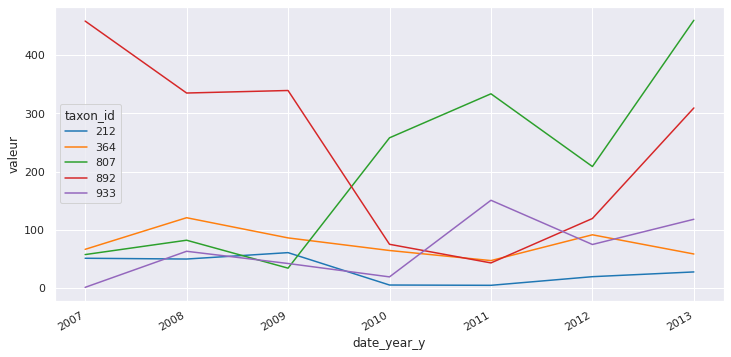

In [442]:
taxon_test = df_station.groupby('taxon_id').count().sort_values('liste_ff_id', ascending=False).head(5).index.tolist()
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=df_station[(df_station['taxon_id'].isin(taxon_test))], x="date_year_y", y="valeur",
             hue="taxon_id", ci=None, ax=ax, palette="tab10")
fig.autofmt_xdate()
plt.show()

In [397]:
taxon[taxon['id'] == 807]

,id,nom_latin,taxon_parent_id
97,807,Chironomidae,746.0


Selon wikipedia "Après une pollution organique majeure ou durable, les Chironomidae font partie des espèces pionnières qui contribuent à la résilience de l'écosystème.". Le pic l'augmentation de la population de cette espèce à partir de 2009 pourrait signifier qu'il y a eu une pollution à partir de ce moment. De plus cela correspond au même moment que le taxon 892 baisse en population

In [443]:
df_station

,id,date_year_x,nom_masse_eau,her,st_x,st_y,date_year_y,date_prel,liste_faunistique_floristique,facies_substrat,facies_vitesse,facies_profondeur,liste_ff_id,taxon_id,valeur,critere_taxon,critere_taxon_id
21839,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2007,2007-09-27 00:00:00.000,3535235,pierres,5 cm/s <= vitesse < 25 cm/s,NaN,3535235,6752,2.0,Nombre exact d'individus,1
21840,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2007,2007-09-27 00:00:00.000,3535235,pierres,5 cm/s <= vitesse < 25 cm/s,NaN,3535235,10586,1.0,Nombre exact d'individus,1
21841,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2007,2007-09-27 00:00:00.000,3535235,pierres,5 cm/s <= vitesse < 25 cm/s,NaN,3535235,7995,6.0,Nombre exact d'individus,1
21842,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2007,2007-09-27 00:00:00.000,3535235,pierres,5 cm/s <= vitesse < 25 cm/s,NaN,3535235,8987,11.0,Nombre exact d'individus,1
21843,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2007,2007-09-27 00:00:00.000,3535235,pierres,5 cm/s <= vitesse < 25 cm/s,NaN,3535235,10849,2.0,Nombre exact d'individus,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22998,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2012,2012-08-02 00:00:00.000,3679687,NaN,NaN,NaN,3679687,2088,1.0,Nombre exact d'individus,1
22999,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2012,2012-08-02 00:00:00.000,3679687,NaN,NaN,NaN,3679687,2113,7.0,Nombre exact d'individus,1
23001,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2012,2012-08-02 00:00:00.000,3679687,NaN,NaN,NaN,3679687,2133,9.0,Nombre exact d'individus,1
23007,413949,2013,La Savoureuse du rejet etang des Forges a la c...,18,989131.0,6720526.0,2012,2012-08-02 00:00:00.000,3679687,NaN,NaN,NaN,3679687,2193,6.0,Nombre exact d'individus,1


In [439]:
ph_station = ph_alsace[ph_alsace['stn_id'] == station_test]
ph_station

,stn_id,date_year,valeur,parameter,parameter_name,unite,unite_name
144930,413949,2007,13.383333,1301,Température de l'Eau,27,degré Celsius
144931,413949,2008,10.783333,1301,Température de l'Eau,27,degré Celsius
144932,413949,2009,12.833333,1301,Température de l'Eau,27,degré Celsius
144933,413949,2010,12.233333,1301,Température de l'Eau,27,degré Celsius
144934,413949,2011,13.266667,1301,Température de l'Eau,27,degré Celsius
...,...,...,...,...,...,...,...
145028,413949,2007,13.200000,1375,Sodium,162,milligramme par litre
145029,413949,2008,7.150000,1375,Sodium,162,milligramme par litre
145030,413949,2010,12.650000,1375,Sodium,162,milligramme par litre
145031,413949,2011,15.000000,1375,Sodium,162,milligramme par litre


In [428]:
param = ph_station['parameter_name'].unique().tolist()

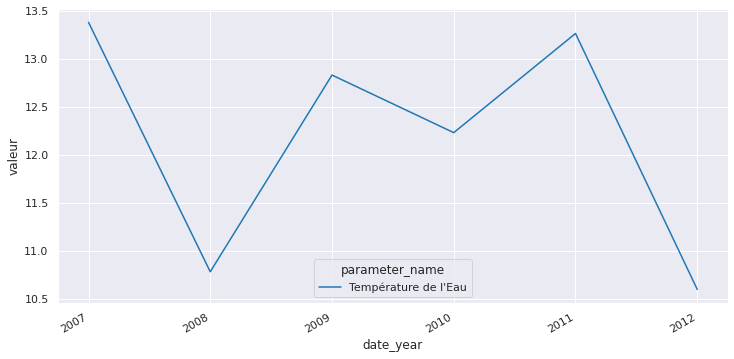

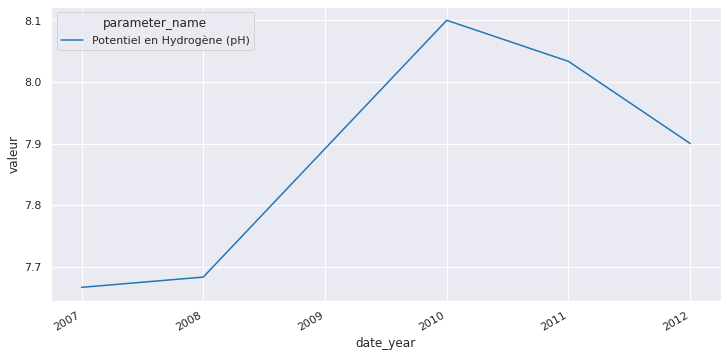

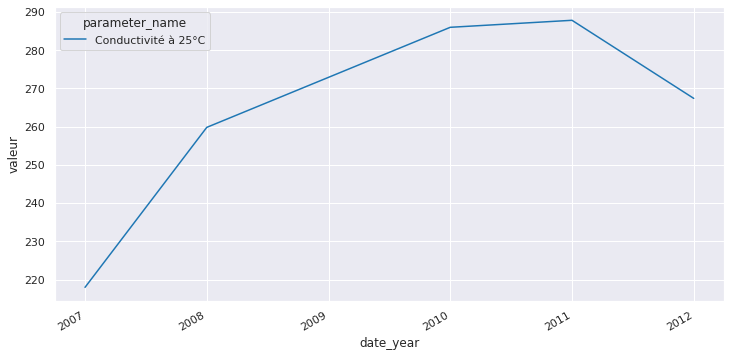

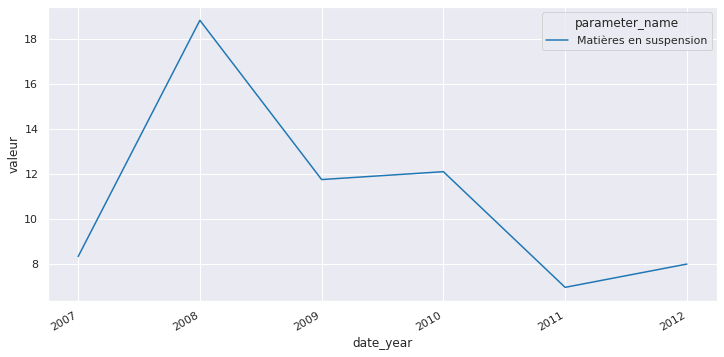

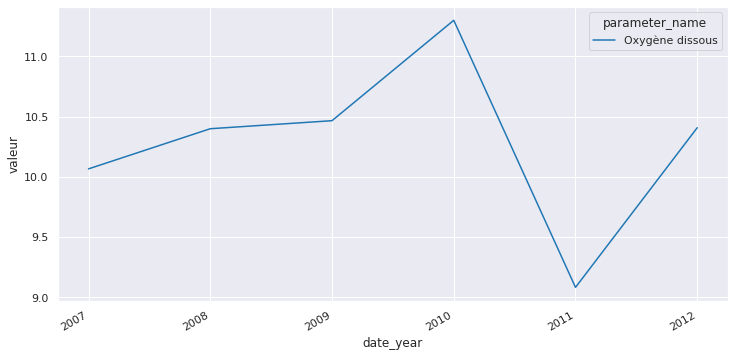

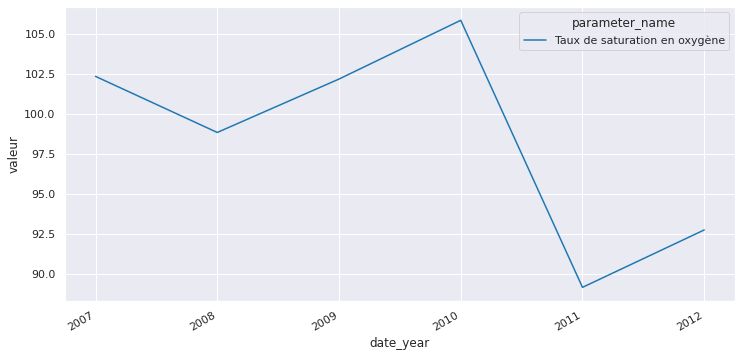

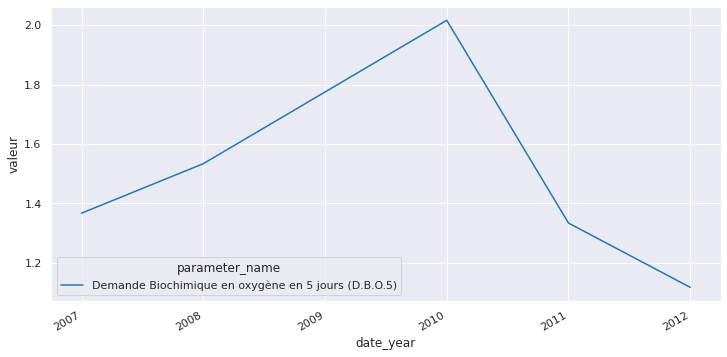

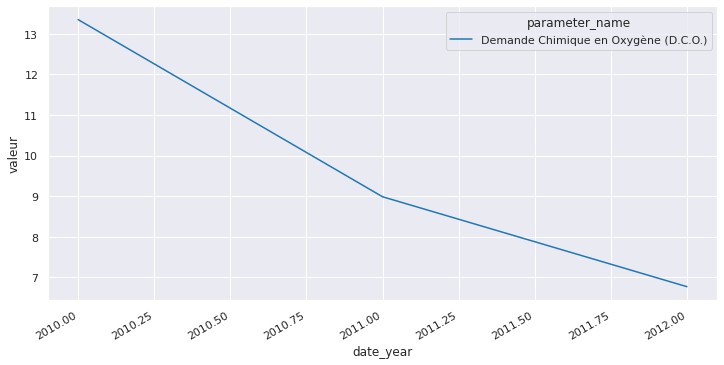

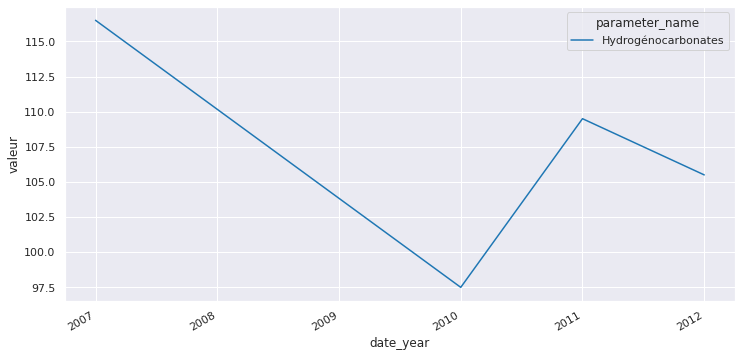

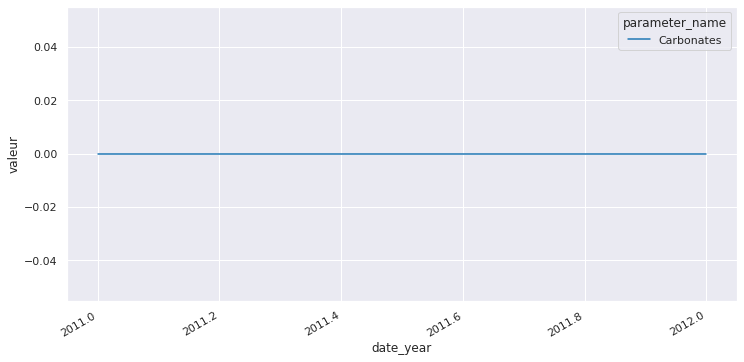

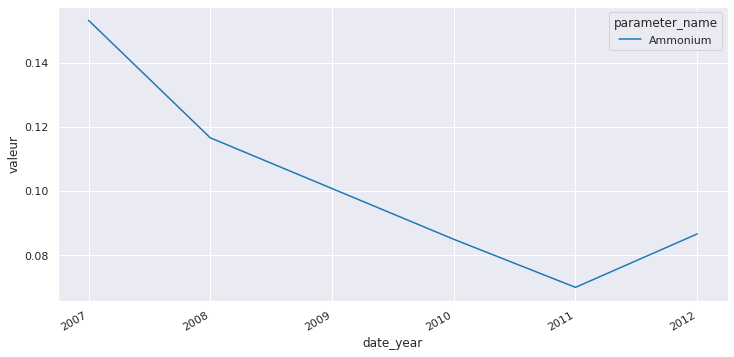

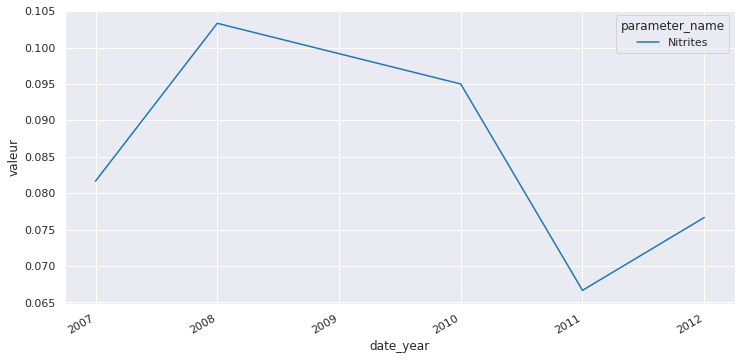

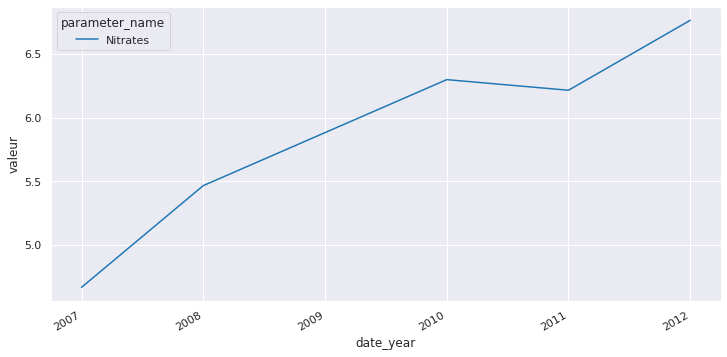

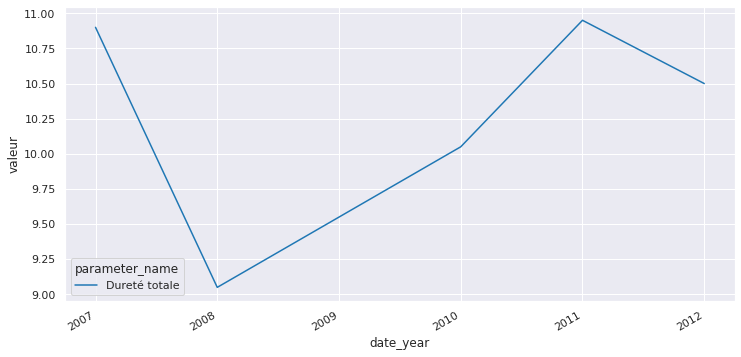

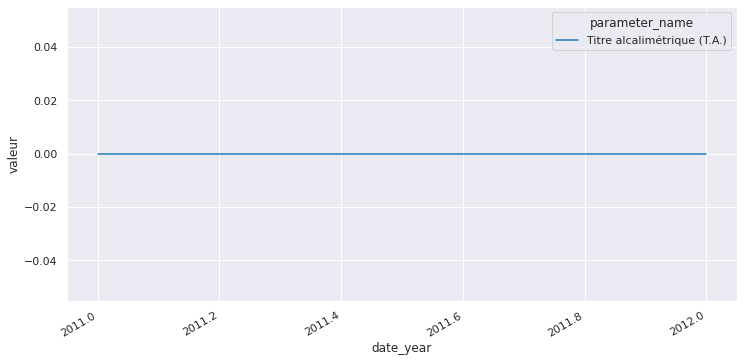

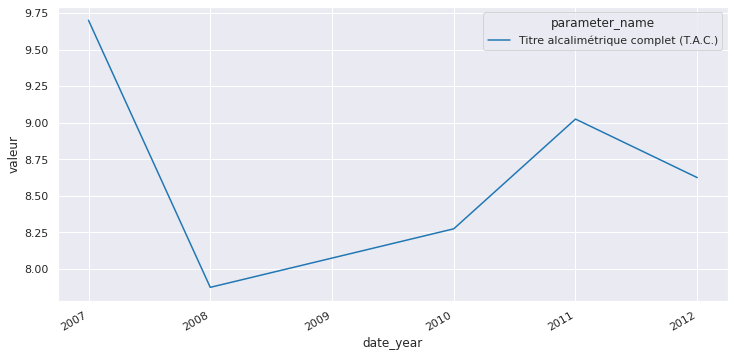

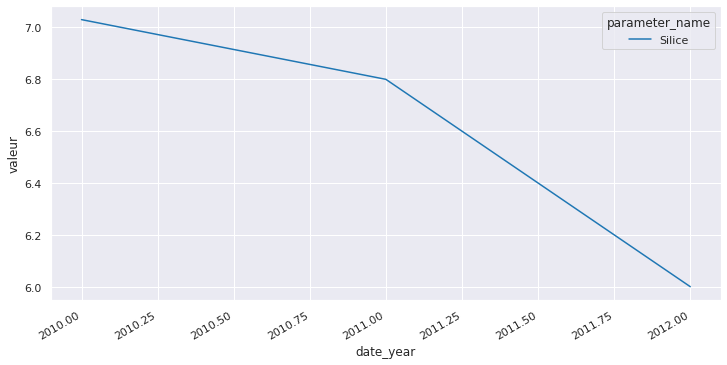

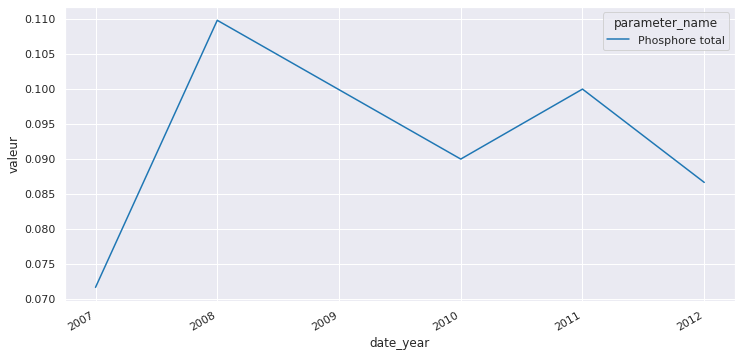

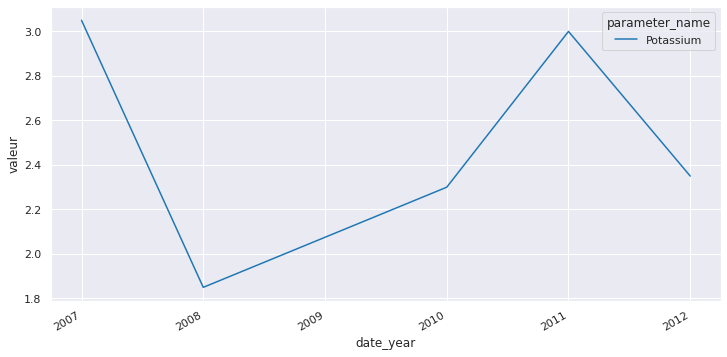

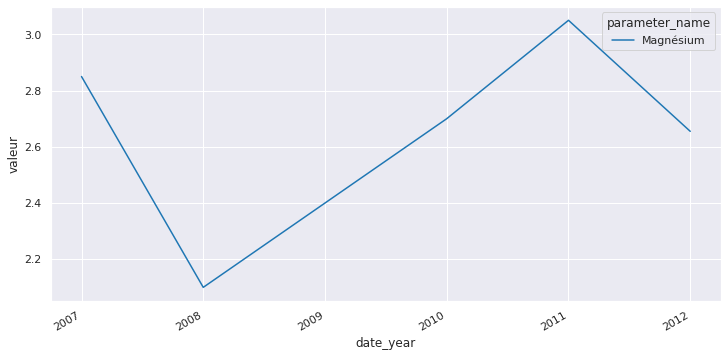

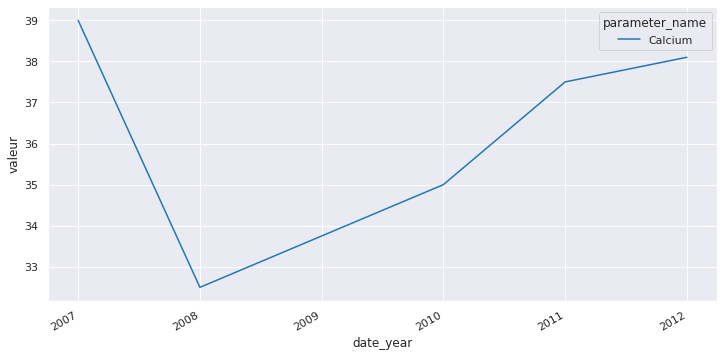

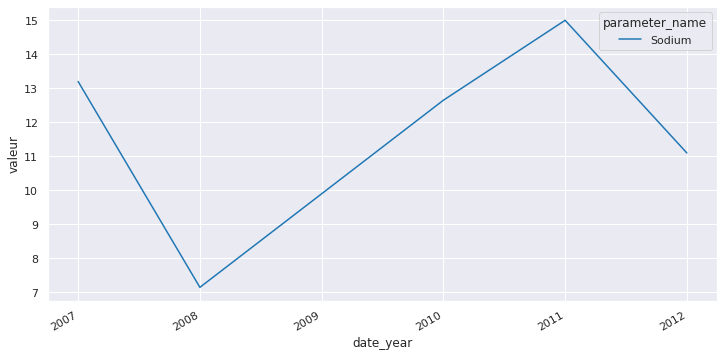

In [429]:
for p in param:
    fig, ax = plt.subplots(figsize = (12,6))
    sns.lineplot(data=ph_station[(ph_station['parameter_name'] == p)], x="date_year", y="valeur", hue='parameter_name', ci=None, ax=ax, palette="tab10")
    fig.autofmt_xdate()
    plt.show()
#sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

On observe que les nitrates sont en augmentation depuis 2007, ce qui pourrait expliquer le phénomène ci-dessus

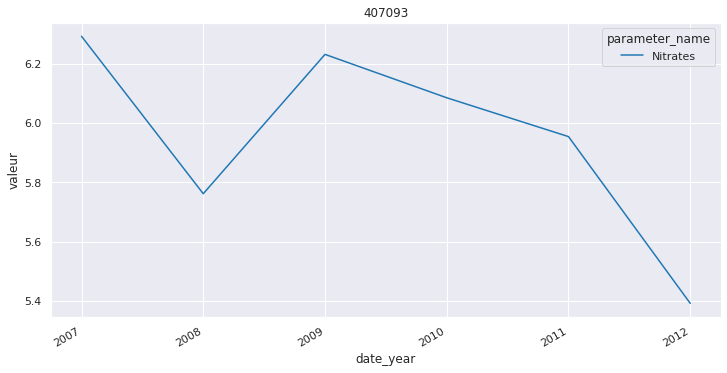

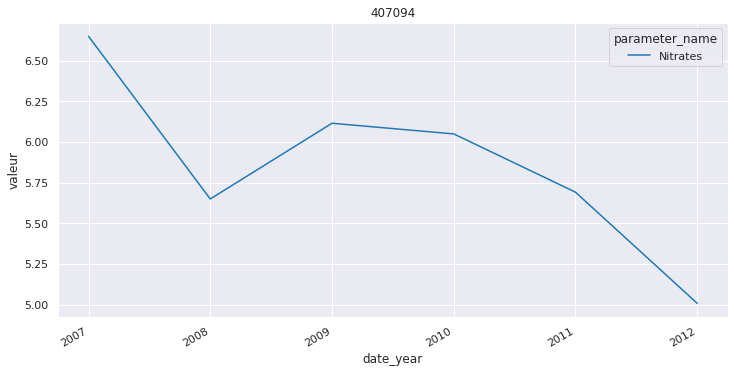

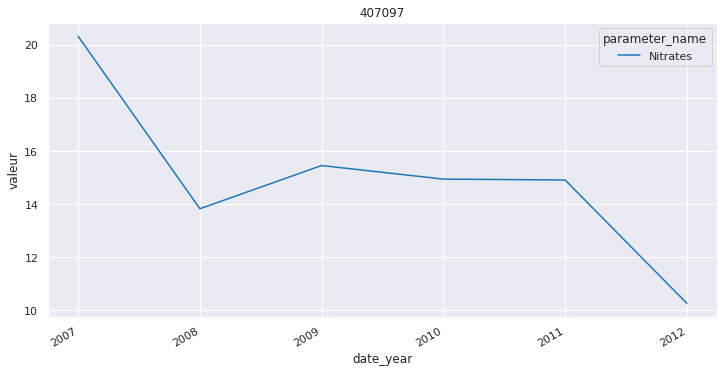

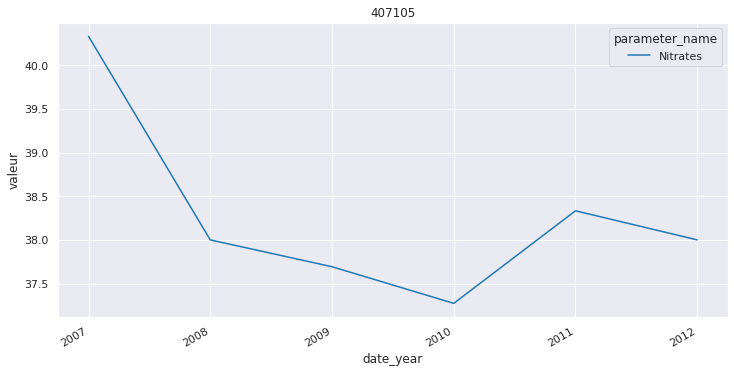

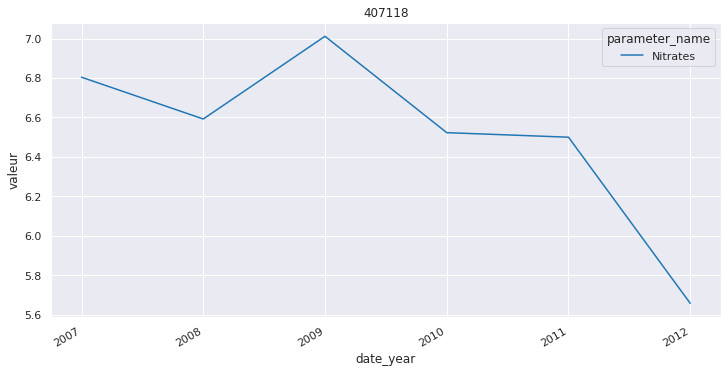

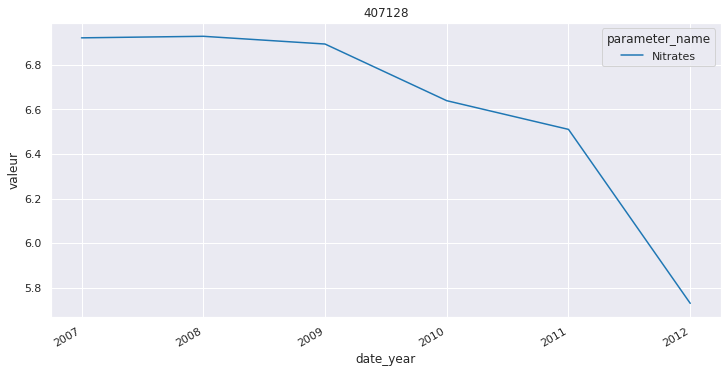

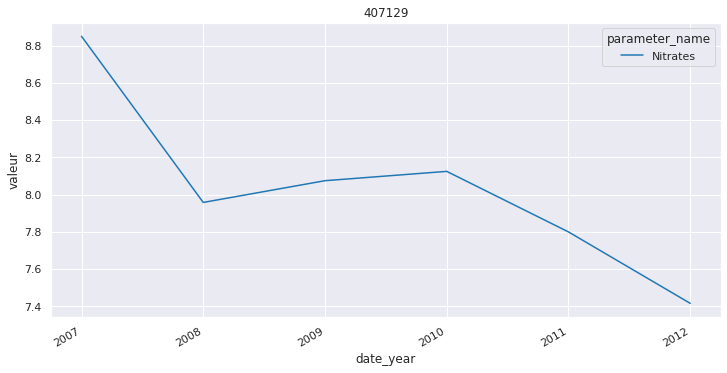

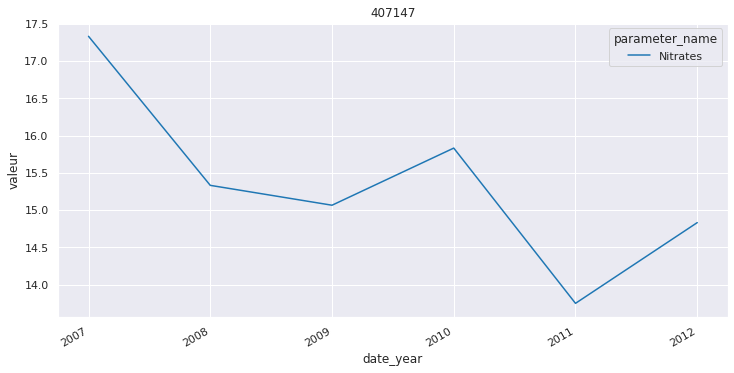

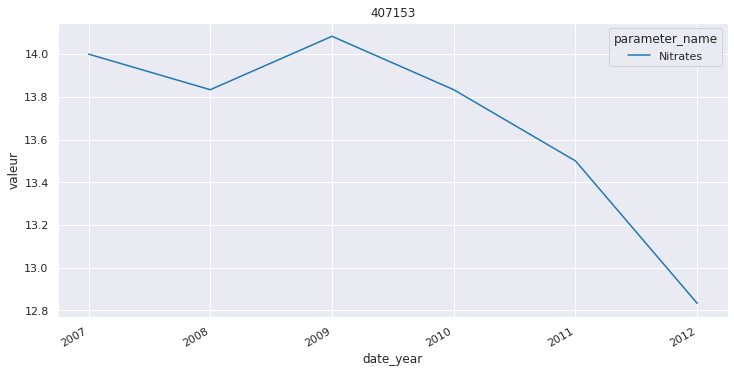

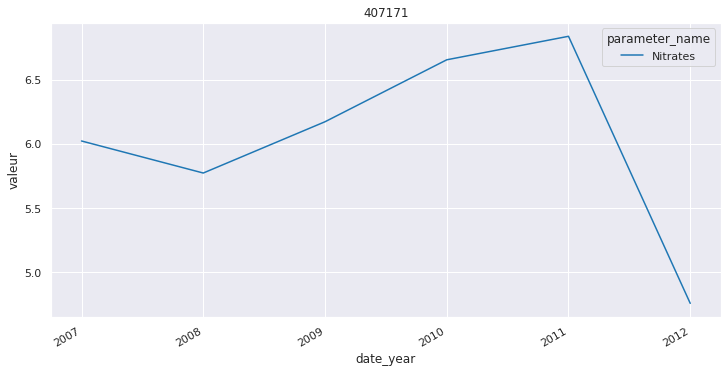

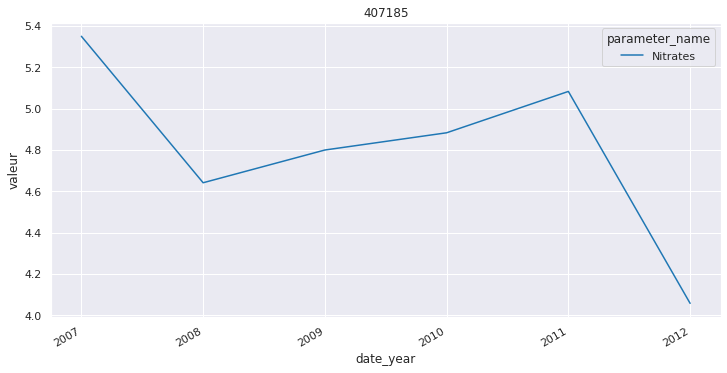

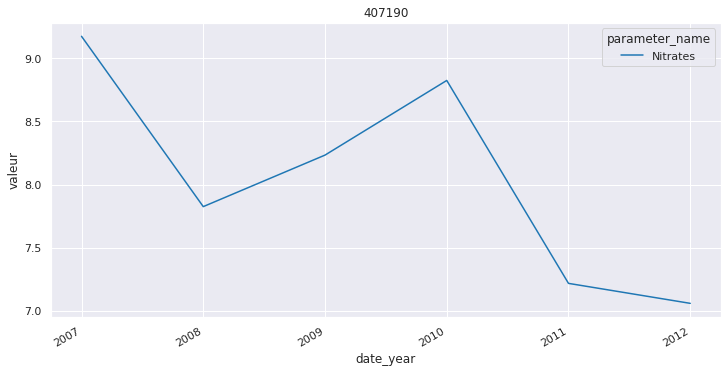

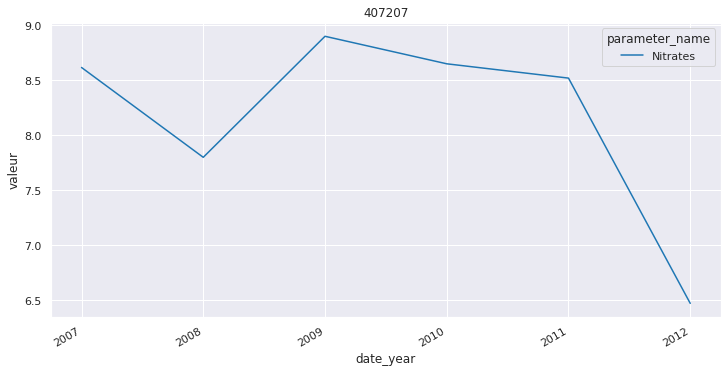

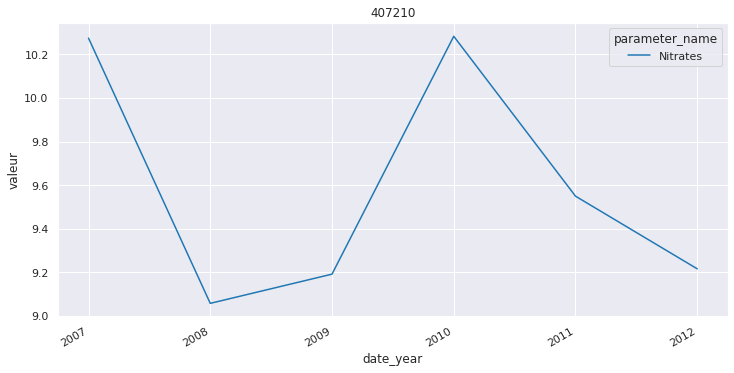

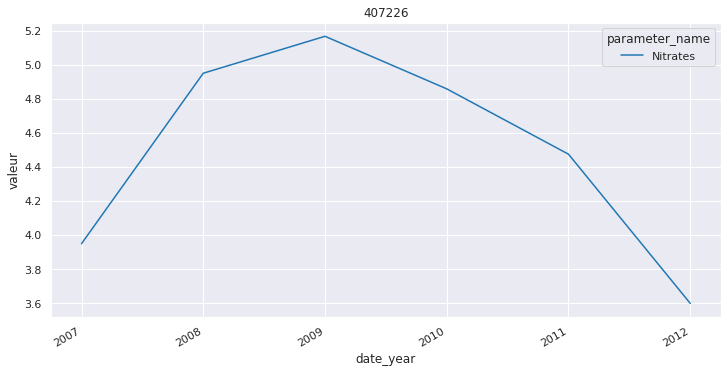

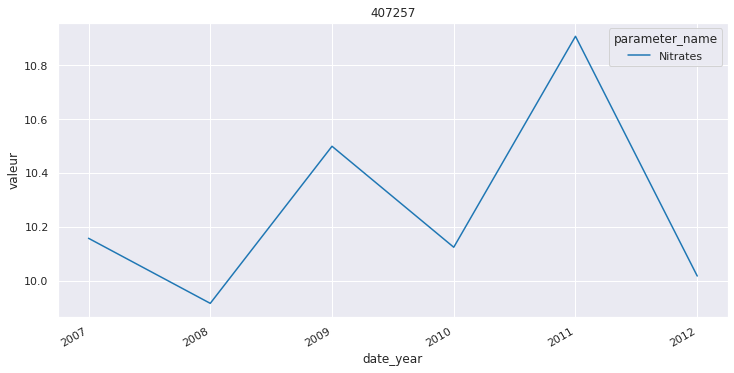

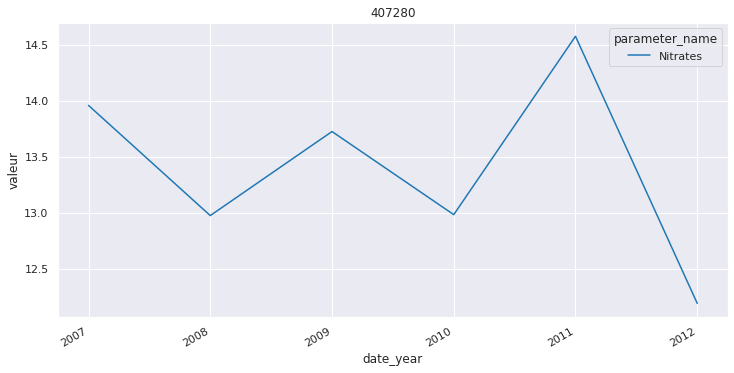

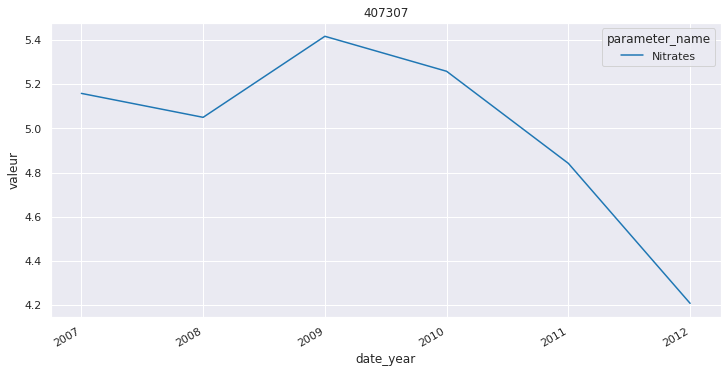

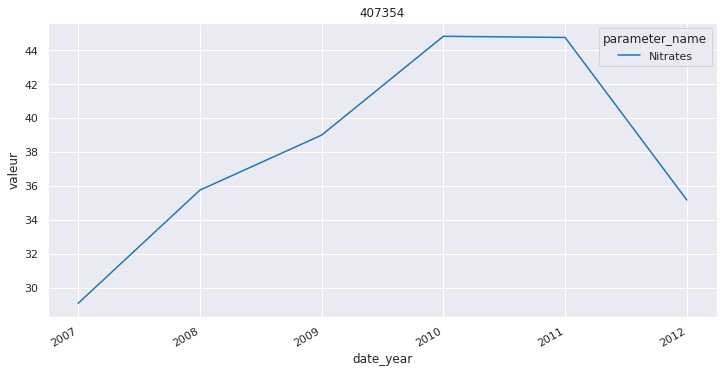

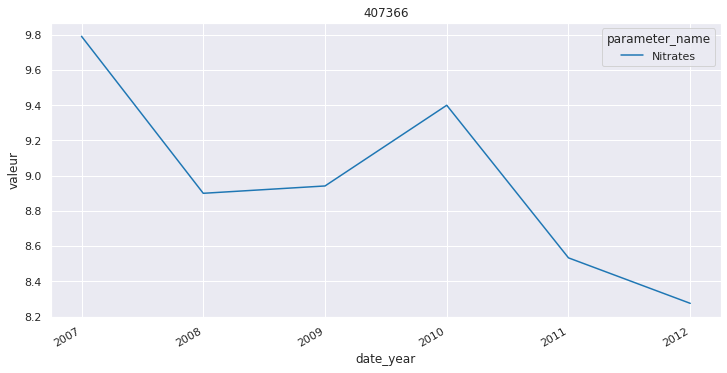

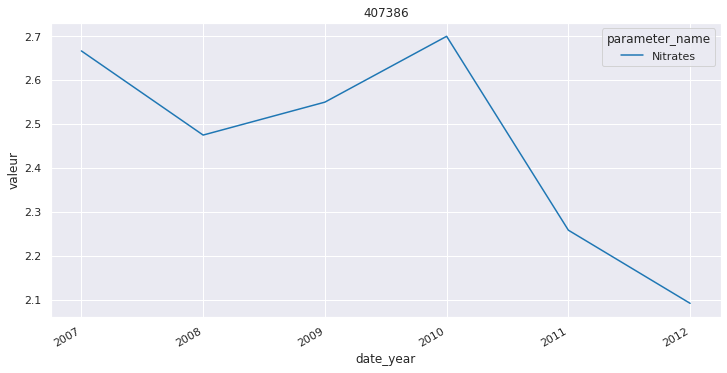

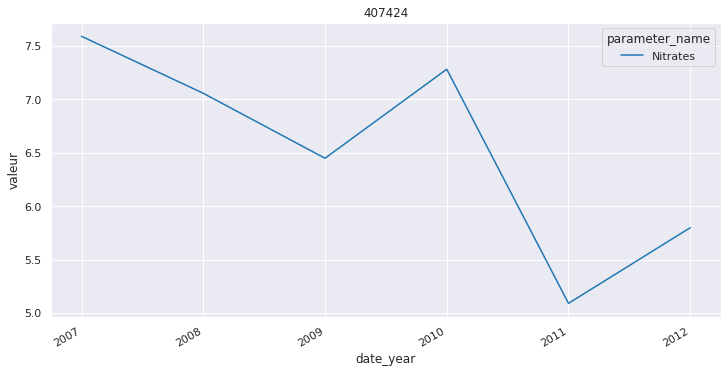

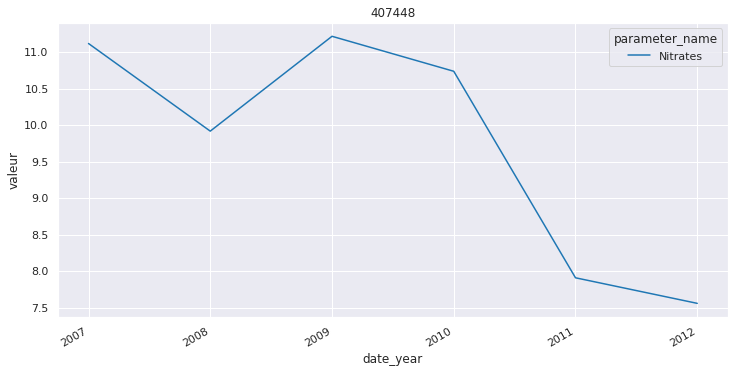

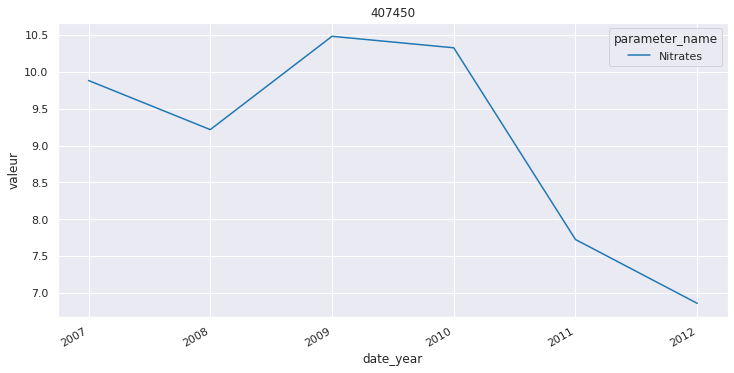

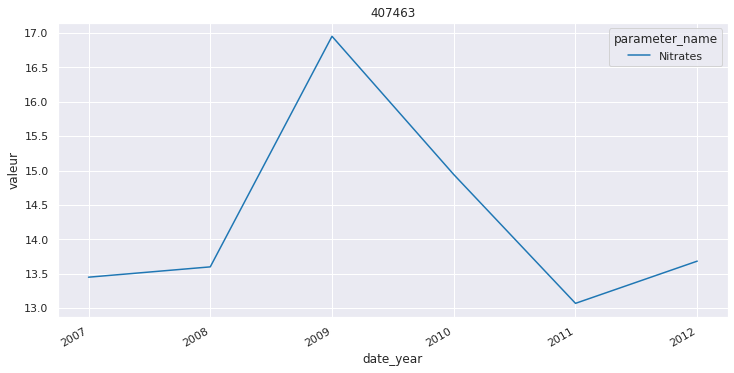

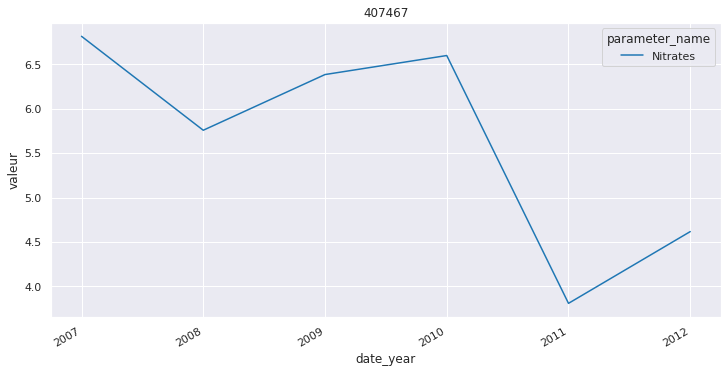

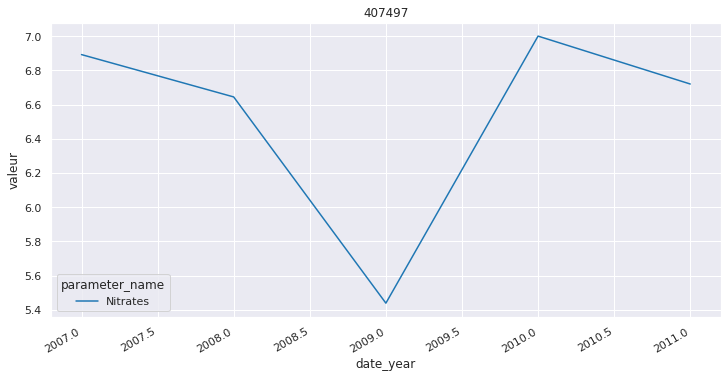

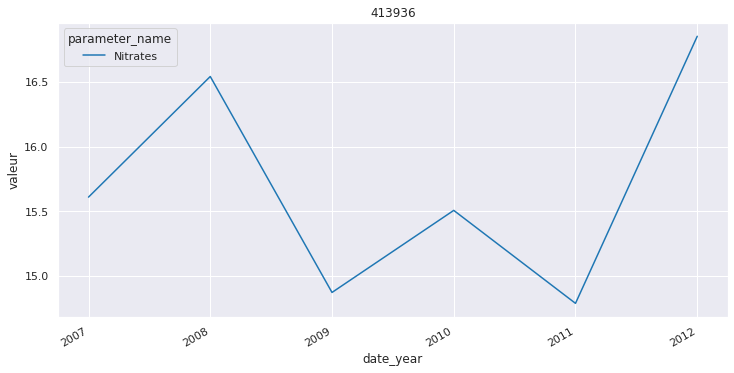

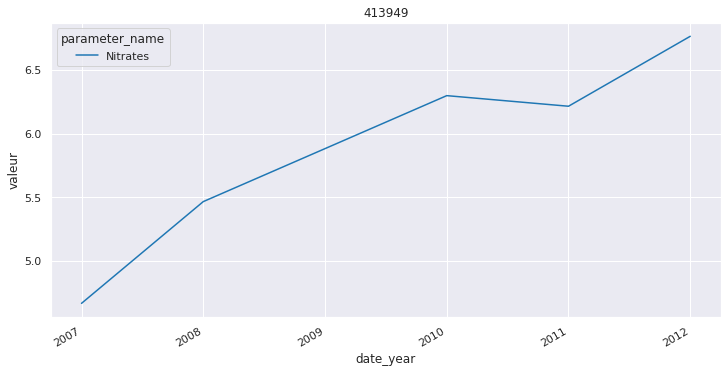

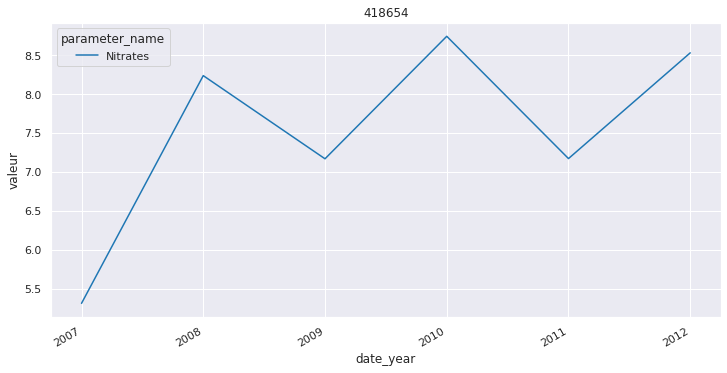

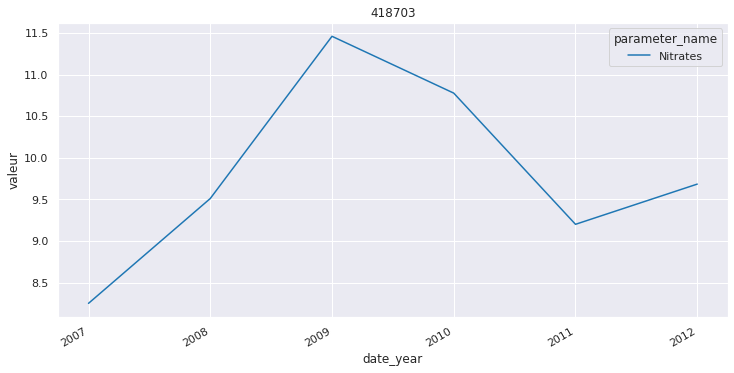

In [433]:
stn_nitrate = taxon_faune_nbr_alsace['id'].unique().tolist()
for s in stn_nitrate:
    ph_station = ph_alsace[ph_alsace['stn_id'] == s]
    fig, ax = plt.subplots(figsize = (12,6))
    sns.lineplot(data=ph_station[(ph_station['parameter_name'] == 'Nitrates')], x="date_year", y="valeur", hue='parameter_name', ci=None, ax=ax, palette="tab10")
    plt.title(s)
    fig.autofmt_xdate()
    plt.show()
#sns.histplot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.8)

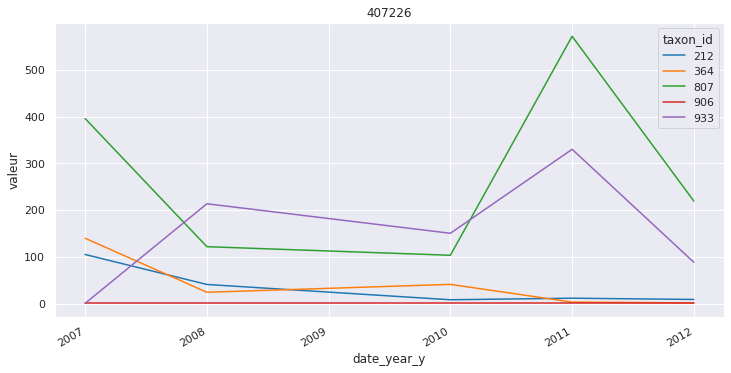

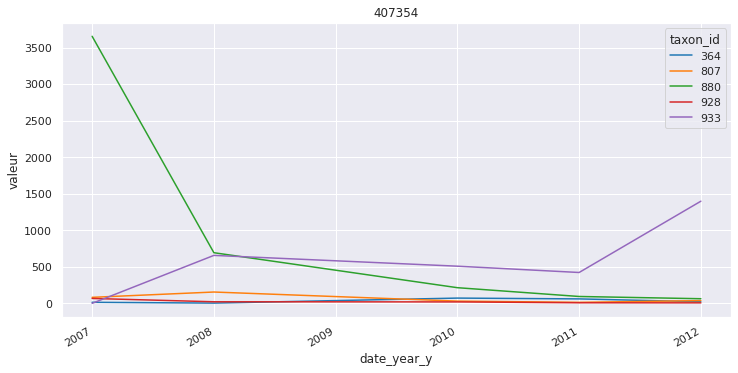

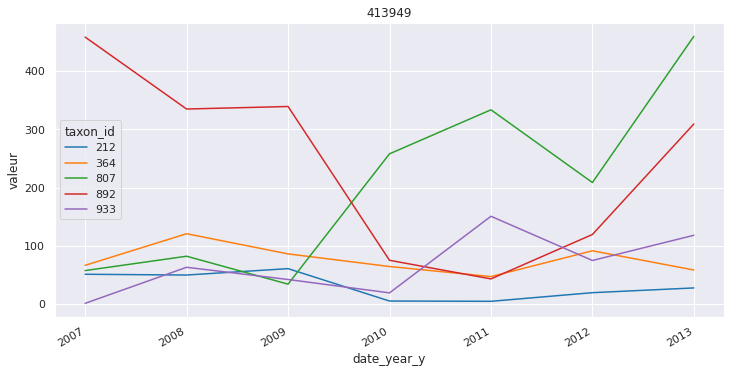

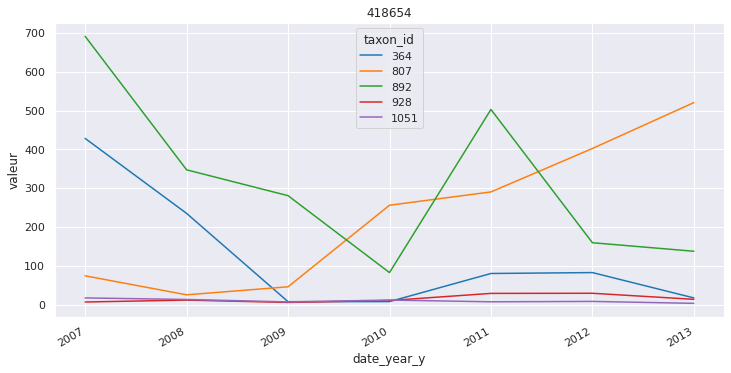

In [438]:
stn_nitrate_evol = [407226, 407354, 413949, 418654]
for s in stn_nitrate_evol:
    df_station = taxon_faune_nbr_alsace[taxon_faune_nbr_alsace['id'] == s]
    taxon_test = df_station.groupby('taxon_id').count().sort_values('liste_ff_id', ascending=False).head(5).index.tolist()
    fig, ax = plt.subplots(figsize = (12,6))
    sns.lineplot(data=df_station[(df_station['taxon_id'].isin(taxon_test))], x="date_year_y", y="valeur",
                 hue="taxon_id", ci=None, ax=ax, palette="tab10")
    plt.title(s)
    fig.autofmt_xdate()
    plt.show()

On observe le même comportement pour les taxons 807 et 892 pour les deux dernières stations ci-dessous, qui pourrait correspondre à l'augmentation de nitrate (il est possible que c'est deux stations soit sur des eaux liées)